# Tissue Classification of a T1-weighted Structural Image

This example explains how to segment a T1-weighted structural image by using a 
Bayesian formulation. The observation model (likelihood term) is defined as a 
Gaussian distribution and a Markov Random Field (MRF) is used to model the a 
priori probability of the context-dependent patterns of the different tissue 
types of the brain. Expectation Maximization and Iterated Conditional 
Modes are used to find the optimal solution. Similar algorithms have been 
proposed by Zhang et al. [Zhang2001]_ and Avants et al. [Avants2011]_ available
in FAST-FSL and ANTS-atropos, respectively.

Here we will use a T1-weighted image, that has been previously skull-stripped
and bias field corrected.
"""

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from dipy.data import fetch_tissue_data, read_tissue_data
from dipy.segment.tissue import TissueClassifierHMRF


First we fetch the T1 volume from the Syn dataset and determine its shape.

In [16]:
fetch_tissue_data()
t1_img = read_tissue_data()
t1 = t1_img.get_data()
print('t1.shape (%d, %d, %d)' % t1.shape)

Dataset is already in place. If you want to fetch it again please first remove the folder /home/koskovi/.dipy/tissue_data 
t1.shape (256, 256, 176)


We have fetched the T1 volume. Now we will look at the axial and the coronal
slices of the image.

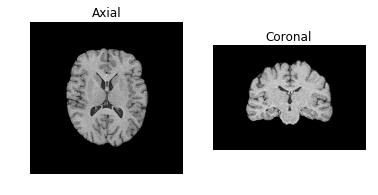

In [17]:
fig = plt.figure()
a = fig.add_subplot(1, 2, 1)
img_ax = np.rot90(t1[..., 89])
imgplot = plt.imshow(img_ax, cmap="gray")
a.axis('off')
a.set_title('Axial')
a = fig.add_subplot(1, 2, 2)
img_cor = np.rot90(t1[:, 128, :])
imgplot = plt.imshow(img_cor, cmap="gray")
a.axis('off')
a.set_title('Coronal')
#plt.savefig('t1_image.png', bbox_inches='tight', pad_inches=0)

Now we will define the other two parameters for the segmentation algorithm.
We will segment three classes, namely corticospinal fluid (CSF), white matter
(WM) and gray matter (GM).

In [18]:
nclass = 3 

Then, the smoothness factor of the segmentation. Good performance is achieved
with values between 0 and 0.5.


In [19]:
beta = 0.1

We could also set the number of iterations. By default this parameter is set to
100 iterations, but most of the times the the ICM (Iterated Conditional Modes)
loop will converge before reaching the 100th iteration.
After setting the necessary parameters we can now call an instance of the class
"TissueClassifierHMRF" and its method called "classify" and input the
parameters defined above to perform the segmentation task.


>> Iteration: 0
>> Iteration: 1
>> Iteration: 2
>> Iteration: 3
>> Iteration: 4
>> Iteration: 5
>> Iteration: 6
>> Iteration: 7
>> Iteration: 8
>> Iteration: 9
>> Iteration: 10
>> Iteration: 11
>> Iteration: 12
>> Iteration: 13
>> Iteration: 14
>> Iteration: 15
>> Iteration: 16
>> Iteration: 17
>> Iteration: 18
>> Iteration: 19
>> Iteration: 20
Total time:248.894261122


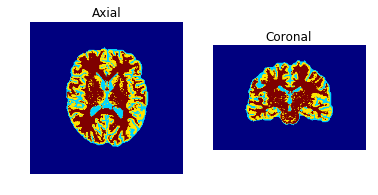

In [20]:
import time
t0 = time.time()

hmrf = TissueClassifierHMRF()
initial_segmentation, final_segmentation, PVE = hmrf.classify(t1, nclass, beta)

t1 = time.time()
total_time = t1-t0
print('Total time:' + str(total_time))

fig = plt.figure()
a = fig.add_subplot(1, 2, 1)
img_ax = np.rot90(final_segmentation[..., 89])
imgplot = plt.imshow(img_ax)
a.axis('off')
a.set_title('Axial')

a = fig.add_subplot(1, 2, 2)
img_cor = np.rot90(final_segmentation[:, 128, :])
imgplot = plt.imshow(img_cor)
a.axis('off')
a.set_title('Coronal')

#plt.savefig('final_seg.png', bbox_inches='tight', pad_inches=0)

Now we plot the resulting segmentation.<br>

Each tissue class is color coded separately, red for the WM, yellow for
the GM and light blue for the CSF.<br>

And we will also have a look at the probability maps for each tissue class.

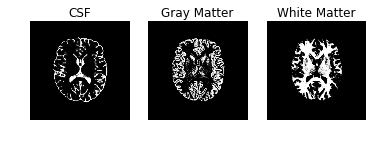

In [21]:
fig = plt.figure()
a = fig.add_subplot(1, 3, 1)
img_ax = np.rot90(PVE[..., 89, 0])
imgplot = plt.imshow(img_ax, cmap="gray")
a.axis('off')
a.set_title('CSF')
a = fig.add_subplot(1, 3, 2)
img_cor = np.rot90(PVE[:, :, 89, 1])
imgplot = plt.imshow(img_cor, cmap="gray")
a.axis('off')
a.set_title('Gray Matter')
a = fig.add_subplot(1, 3, 3)
img_cor = np.rot90(PVE[:, :, 89, 2])
imgplot = plt.imshow(img_cor, cmap="gray")
a.axis('off')
a.set_title('White Matter')
#plt.savefig('probabilities.png', bbox_inches='tight', pad_inches=0)
plt.show()